___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

### Naming Conventions of G2
1 - df = dataframe name 
2 - scaled_df = scalded dataframe name  
3 - fraud_df = only fraudalent transections part of the dataframe   
4 - non_fraud_df = non-fraudalent transactions part of the dataframe   
5 -     
6 -     
7 -     
8 -     
9 -     
10 -    
11 - col = column names of the clean df 
12 - class_weights = to be used (if prefered) for the first runs of the models  
13 - cat = Our cateogrical variable ("daytime" as list (is late one-hot encoded in pipeline))   
14 - class_weights_manuel =  (0:1, 1:15 for log) 
15 - random_state = 46   
16 -    
17 -    
18 - X =  Features  
19 - y =  Target ("class")  
20 - X_over = Oversampled X     
21 - y_over = Oversamapled y    
22 - X_under = Undersampled X      
23 - y_under = Undersampled y   
24 - X_resampled = Hybrid (bod under and over sampled) sampled X    
25 - y_resampled = Hybrid (bod under and over sampled) sampled y    
26 - 
27 - 
28 - 
29 - 
30 - log_results_pkl = log results file


### GitHub Review:
 -- Terminali açıyoruz----  
 --önce terminalden repository klasörünü yi indireceğimiz klasöre gidiyoruz (cd ???, ls, cd ?? ls, ..)

In [1]:
# Terminalden klasörü kaydedeceğimiz yere geliyoruz

# git clone https://github.com/Kadir-Ozkan/Credit-Card-Fraud-Detection.git      

# klasör geldi mi kontrol ediyoruz


# ----------make necessary changes-------------------------------


# git status -- Gözden kaçan birşey varmı önce kontrol edelim :)

# git add Fraud_Detection_G2_8_11_Ver_4.ipynb         

# --------Başlamamış olanlar bu dosyadan başlarlarsa daha iyi olur. Başlayan varsa söylesin versiyon 3'e aktaracağım buradakileri---------

# git commit -m "?????????"

# git branch -M main (branch değişmediyse gerek yok)
# git push -u origin main

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import plotly.express as px

# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

# conda install -c conda-forge xgboost
# #from xgboost import XGBClassifier, plot_importance

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# UnSupervised
from sklearn.cluster import KMeans

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import pickle

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#df=pd.read_csv('~/Downloads/creditcard.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/Fraud_Project/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/github_data/creditcard.csv')

In [7]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from skimpy import clean_columns
df = clean_columns(df)

In [10]:
df

,time,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,amount,class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0


In [11]:
df.head()

,time,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,amount,class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [12]:
df.columns

Index(['time', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_15', 'v_16', 'v_17', 'v_18',
       'v_19', 'v_20', 'v_21', 'v_22', 'v_23', 'v_24', 'v_25', 'v_26', 'v_27',
       'v_28', 'amount', 'class'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v_1     284807 non-null  float64
 2   v_2     284807 non-null  float64
 3   v_3     284807 non-null  float64
 4   v_4     284807 non-null  float64
 5   v_5     284807 non-null  float64
 6   v_6     284807 non-null  float64
 7   v_7     284807 non-null  float64
 8   v_8     284807 non-null  float64
 9   v_9     284807 non-null  float64
 10  v_10    284807 non-null  float64
 11  v_11    284807 non-null  float64
 12  v_12    284807 non-null  float64
 13  v_13    284807 non-null  float64
 14  v_14    284807 non-null  float64
 15  v_15    284807 non-null  float64
 16  v_16    284807 non-null  float64
 17  v_17    284807 non-null  float64
 18  v_18    284807 non-null  float64
 19  v_19    284807 non-null  float64
 20  v_20    284807 non-null  float64
 21  v_21    28

In [14]:
df.columns

Index(['time', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_15', 'v_16', 'v_17', 'v_18',
       'v_19', 'v_20', 'v_21', 'v_22', 'v_23', 'v_24', 'v_25', 'v_26', 'v_27',
       'v_28', 'amount', 'class'],
      dtype='object')

In [15]:
col=(['time', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_15', 'v_16', 'v_17', 'v_18',
       'v_19', 'v_20', 'v_21', 'v_22', 'v_23', 'v_24', 'v_25', 'v_26', 'v_27',
       'v_28', 'amount', 'class', 'hour', 'daytime'])

In [16]:
Num_of_Uniques=df.nunique()
Num_of_Uniques


time      124592
v_1       275663
v_2       275663
v_3       275663
v_4       275663
v_5       275663
v_6       275663
v_7       275663
v_8       275663
v_9       275663
v_10      275663
v_11      275663
v_12      275663
v_13      275663
v_14      275663
v_15      275663
v_16      275663
v_17      275663
v_18      275663
v_19      275663
v_20      275663
v_21      275663
v_22      275663
v_23      275663
v_24      275663
v_25      275663
v_26      275663
v_27      275663
v_28      275663
amount     32767
class          2
dtype: int64

In [17]:
df.shape

(284807, 31)

### Data Cleaning
Check Missing Values and Outliers

In [18]:
Num_of_Nulls = df.isnull().sum()
Num_of_Nulls

time      0
v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
v_11      0
v_12      0
v_13      0
v_14      0
v_15      0
v_16      0
v_17      0
v_18      0
v_19      0
v_20      0
v_21      0
v_22      0
v_23      0
v_24      0
v_25      0
v_26      0
v_27      0
v_28      0
amount    0
class     0
dtype: int64

In [19]:
df.duplicated().sum()

1081

In [20]:
fraud = df[df['class'] == 1].duplicated().sum()
fraud

19

In [21]:
percentage = fraud/len(df[df['class'] == 1])*100
percentage

3.861788617886179

In [22]:
df=df.drop_duplicates()

In [23]:
df.shape

(283726, 31)

### Exploratory Data Analysis

In [24]:
df.describe().T.style.background_gradient(cmap='RdYlGn', axis=1)

,count,mean,std,min,25%,50%,75%,max
time,283726.000000,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
v_1,283726.000000,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
v_2,283726.000000,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
v_3,283726.000000,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
v_4,283726.000000,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
v_5,283726.000000,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
v_6,283726.000000,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
v_7,283726.000000,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
v_8,283726.000000,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
v_9,283726.000000,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [25]:
df.groupby('class').describe()

time                                                             \
           count      mean       std     min       25%       50%        75%   
class                                                                         
0     283253.000 94835.058 47475.551   0.000 54233.000 84711.000 139308.000   
1        473.000 80450.514 48636.180 406.000 41203.000 73408.000 129095.000   

                        v_1                                                  \
             max      count   mean   std     min    25%    50%    75%   max   
class                                                                         
0     172792.000 283253.000  0.013 1.922 -56.408 -0.913  0.023  1.317 2.455   
1     170348.000    473.000 -4.498 6.593 -30.552 -5.604 -2.272 -0.361 2.132   

             v_2                                                       v_3  \
           count   mean   std     min    25%   50%   75%    max      count   
class                                                                        
0     283253.000 -0.010 1.634 -72.716 -0.601 0.063 0.797 18.902 283253.000   
1        473.000  3.406 4.123  -8.402  1.145 2.617 4.572 22.058    473.000   

                                                             v_4               \
        mean   std     min    25%    50%    75%   max      count   mean   std   
class                                                                           
0      0.013 1.458 -48.326 -0.884  0.182  1.028 9.383 283253.000 -0.010 1.399   
1     -6.730 6.910 -31.104 -7.927 -4.875 -2.171 2.250    473.000  4.473 2.872   

                                               v_5                        \
         min    25%    50%   75%    max      count   mean   std      min   
class                                                                      
0     -5.683 -0.852 -0.024 0.734 16.875 283253.000  0.007 1.356 -113.743   
1     -1.313  2.289  4.100 6.291 12.115    473.000 -2.957 5.279  -22.106   

                                        v_6                              \
         25%    50%   75%    max      count   mean   std     min    25%   
class                                                                     
0     -0.688 -0.053 0.612 34.802 283253.000  0.001 1.330 -26.161 -0.768   
1     -4.279 -1.372 0.261 11.095    473.000 -1.433 1.715  -6.406 -2.450   

                                  v_7                                     \
         50%    75%    max      count   mean   std     min    25%    50%   
class                                                                      
0     -0.274  0.398 73.302 283253.000  0.010 1.177 -31.765 -0.550  0.042   
1     -1.420 -0.414  6.474    473.000 -5.176 6.858 -43.557 -6.989 -2.902   

                            v_8                                          \
         75%     max      count   mean   std     min    25%   50%   75%   
class                                                                     
0      0.571 120.589 283253.000 -0.002 1.157 -73.217 -0.209 0.022 0.324   
1     -0.907   5.803    473.000  0.953 5.586 -41.044 -0.162 0.618 1.709   

                    v_9                                                   \
         max      count   mean   std     min    25%    50%    75%    max   
class                                                                      
0     18.709 283253.000  0.003 1.087  -6.291 -0.642 -0.051  0.597 15.595   
1     20.007    473.000 -2.522 2.465 -13.434 -3.797 -2.099 -0.788  3.354   

            v_10                                                        v_11  \
           count   mean   std     min    25%    50%    75%    max      count   
class                                                                          
0     283253.000  0.008 1.036 -14.741 -0.533 -0.092  0.455 23.745 283253.000   
1        473.000 -5.453 4.706 -24.588 -7.298 -4.466 -2.447  4.031    473.000   

                                                           v_12               \
        mean   std    min    25%    50%   75%  

In [26]:
df["class"].value_counts(normalize=True)

0   0.998
1   0.002
Name: class, dtype: float64

In [27]:
from colorama import Fore, Back, Style
def first_looking(col):
    """give only column name as "col_name" not as df["col_name"]"""
    print(Back.BLACK + Fore.YELLOW, "Column name    : ", col, Style.RESET_ALL)
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Value counts")
    print(df[col].value_counts(dropna = False))
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Descriptive statistics")
    print(df[col].describe())
    print()
    print()

In [28]:
first_looking("time")

 Column name    :  time 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  124592
-------------------------------- 
Value counts
3767.000      21
3770.000      20
19912.000     19
3750.000      19
73885.000     17
              ..
127732.000     1
62217.000      1
127739.000     1
127741.000     1
172792.000     1
Name: time, Length: 124592, dtype: int64
-------------------------------- 
Descriptive statistics
count   283726.000
mean     94811.078
std      47481.048
min          0.000
25%      54204.750
50%      84692.500
75%     139298.000
max     172792.000
Name: time, dtype: float64




In [29]:
first_looking("amount")

 Column name    :  amount 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  32767
-------------------------------- 
Value counts
1.000      13566
1.980       6044
0.890       4871
9.990       4738
15.000      3280
           ...  
526.600        1
248.160        1
492.650        1
811.500        1
95.630         1
Name: amount, Length: 32767, dtype: int64
-------------------------------- 
Descriptive statistics
count   283726.000
mean        88.473
std        250.399
min          0.000
25%          5.600
50%         22.000
75%         77.510
max      25691.160
Name: amount, dtype: float64




In [30]:
first_looking("class")

 Column name    :  class 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
-------------------------------- 
Value counts
0    283253
1       473
Name: class, dtype: int64
-------------------------------- 
Descriptive statistics
count   283726.000
mean         0.002
std          0.041
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: class, dtype: float64




In [31]:
df[df['class'] == 1].describe()

,time,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,amount,class
count,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000,473.000
mean,80450.514,-4.498,3.406,-6.730,4.473,-2.957,-1.433,-5.176,0.953,-2.522,-5.453,3.716,-6.103,-0.094,-6.836,-0.073,-4.001,-6.463,-2.157,0.669,0.405,0.467,0.087,-0.096,-0.107,0.041,0.050,0.214,0.078,123.872,1.000
std,48636.180,6.593,4.123,6.910,2.872,5.279,1.715,6.858,5.586,2.465,4.706,2.673,4.582,1.108,4.253,1.046,3.832,6.966,2.902,1.534,1.289,2.731,1.181,1.509,0.518,0.807,0.463,1.246,0.533,260.211,0.000
min,406.000,-30.552,-8.402,-31.104,-1.313,-22.106,-6.406,-43.557,-41.044,-13.434,-24.588,-1.702,-18.684,-3.128,-19.214,-4.499,-14.130,-25.163,-9.499,-3.682,-4.128,-22.798,-8.887,-19.254,-2.028,-4.782,-1.153,-7.263,-1.869,0.000,1.000
25%,41203.000,-5.604,1.145,-7.927,2.289,-4.279,-2.450,-6.989,-0.162,-3.797,-7.298,1.929,-8.602,-0.978,-9.505,-0.638,-6.469,-11.589,-4.569,-0.301,-0.160,0.028,-0.522,-0.342,-0.437,-0.320,-0.263,-0.016,-0.097,1.000,1.000
50%,73408.000,-2.272,2.617,-4.875,4.100,-1.372,-1.420,-2.902,0.618,-2.099,-4.466,3.526,-5.437,-0.064,-6.591,-0.039,-3.303,-5.158,-1.418,0.648,0.286,0.574,0.055,-0.075,-0.061,0.078,0.013,0.395,0.146,9.820,1.000
75%,129095.000,-0.361,4.572,-2.171,6.291,0.261,-0.414,-0.907,1.709,-0.788,-2.447,5.224,-2.825,0.695,-4.252,0.634,-1.142,-1.129,0.116,1.661,0.821,1.193,0.616,0.288,0.282,0.464,0.396,0.821,0.372,105.890,1.000
max,170348.000,2.132,22.058,2.250,12.115,11.095,6.474,5.803,20.007,3.354,4.031,12.019,1.376,2.815,3.442,2.471,3.140,6.739,3.790,5.228,11.059,27.203,8.362,5.466,1.091,2.208,2.745,3.052,1.779,2125.870,1.000


<AxesSubplot:xlabel='class'>

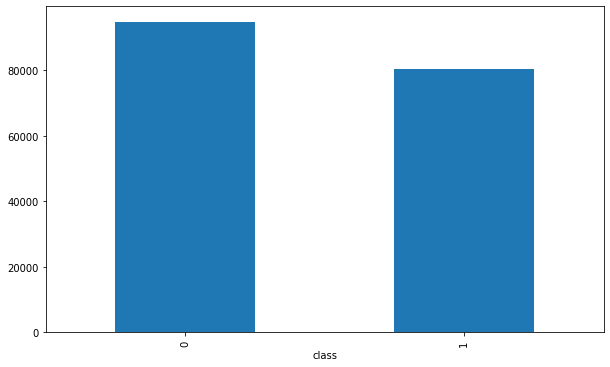

In [32]:
df.groupby(df['class'])['time'].mean().plot(kind='bar')

In [33]:
df["hour"] = df["time"] / (60*60)
df["hour"] = df["hour"].map(lambda x: int(x))
df["hour"].describe()

count   283726.000
mean        25.845
std         13.183
min          0.000
25%         15.000
50%         23.000
75%         38.000
max         47.000
Name: hour, dtype: float64

In [34]:
df["hour"] = df["hour"].map(lambda x: x-24 if x >= 24 else x)
df["hour"].describe()

count   283726.000
mean        14.046
std          5.835
min          0.000
25%         10.000
50%         15.000
75%         19.000
max         23.000
Name: hour, dtype: float64

In [35]:
fraud_df = df[df["class"] == 1]
non_fraud_df = df[df["class"] == 1]

<AxesSubplot:>

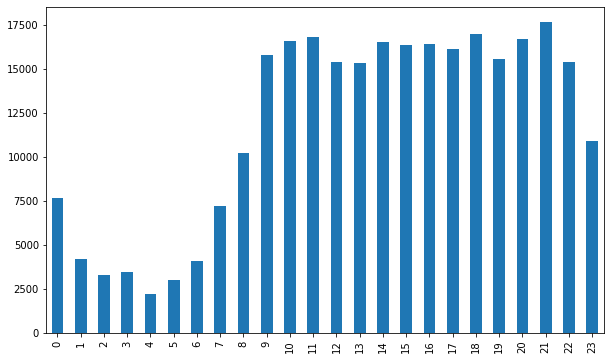

In [36]:
df["hour"].value_counts().sort_index().plot(kind= "bar")

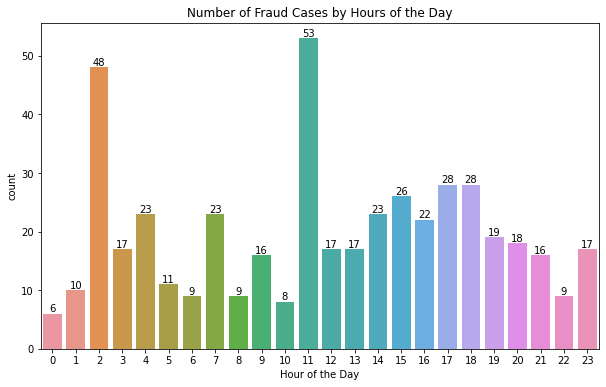

In [37]:
ax = sns.countplot(data= df[df["class"] == 1], x= "hour")
plt.title( "Number of Fraud Cases by Hours of the Day")
plt.xlabel("Hour of the Day")
plt.bar_label(ax.containers[0])
plt.show()

In [38]:
df["daytime"] = df["hour"].map(lambda x:  "22-02-Hours" if x in [22,23,0,1,2] else "03-09-Hours" if x in [3,4,5,6,7,8,9] else "10-21-Hours")
df["daytime"].value_counts()

10-21-Hours    196309
03-09-Hours     45993
22-02-Hours     41424
Name: daytime, dtype: int64

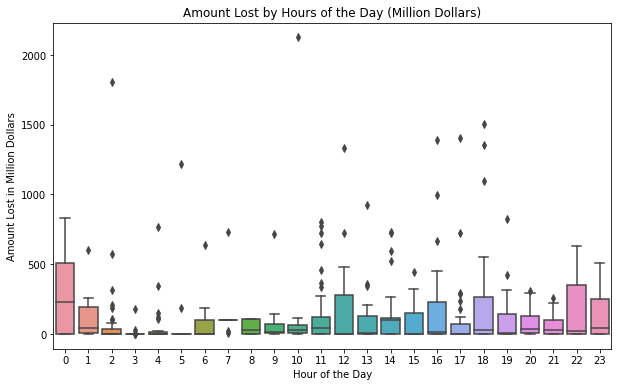

In [39]:
ax = sns.boxplot(data= df[df["class"] == 1], x= "hour", y="amount")
plt.title( "Amount Lost by Hours of the Day (Million Dollars)")
plt.xlabel("Hour of the Day")
plt.ylabel("Amount Lost in Million Dollars")
plt.show()

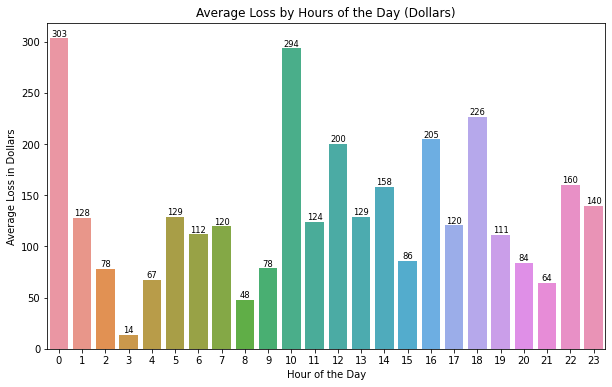

In [40]:
ax = sns.barplot(data= df[df["class"] == 1], x= "hour", y="amount", ci= None)
ax.bar_label(ax.containers[0], fontsize="small", fmt="%.0f")
plt.title( "Average Loss by Hours of the Day (Dollars)")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Loss in Dollars")
plt.show()

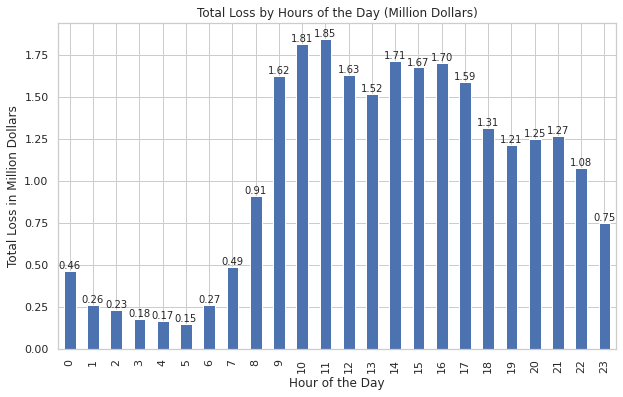

In [41]:
sns.set(style="whitegrid")
ax=df.groupby("hour")["amount"].sum().map(lambda x: x/1000000).plot(kind = "bar")
ax.bar_label(ax.containers[0], fontsize="small", fmt="%.2f")
plt.title( "Total Loss by Hours of the Day (Million Dollars)")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Loss in Million Dollars")
plt.show()

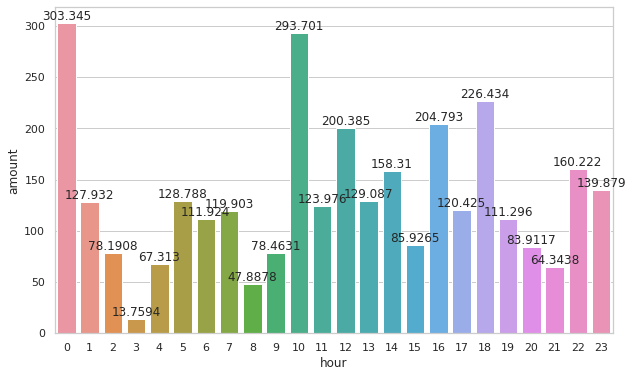

In [42]:
ax = sns.barplot(data= df[df["class"] == 1], x= "hour", y="amount", ci= None)
plt.bar_label(ax.containers[0])
plt.show()

In [43]:
fraud_df["daytime"] = fraud_df["hour"].map(lambda x:  "22-02-Hours" if x in [22,23,0,1,2] else "03-09-Hours" if x in [3,4,5,6,7,8,9] else "10-21-Hours")
fraud_df["daytime"].value_counts()

10-21-Hours    275
03-09-Hours    108
22-02-Hours     90
Name: daytime, dtype: int64

[Text(0, 0, '80.0952'), Text(0, 0, '142.795'), Text(0, 0, '118.583')]

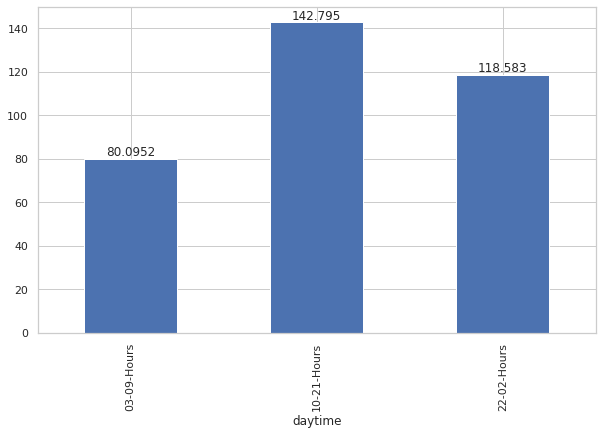

In [44]:
ax = fraud_df.groupby(fraud_df['daytime'])['amount'].mean().plot(kind='bar')
plt.bar_label(ax.containers[0])

In [45]:
df = df.drop(columns = ["hour", "time"], axis=1)
df.head(1)

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,amount,class,daytime
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0,22-02-Hours


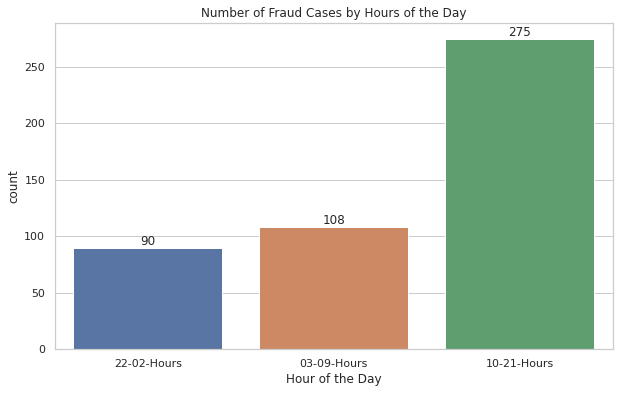

In [46]:
ax = sns.countplot(data= fraud_df[fraud_df["class"] == 1], x= "daytime")
plt.title( "Number of Fraud Cases by Hours of the Day")
plt.xlabel("Hour of the Day")
plt.bar_label(ax.containers[0])
plt.show()

In [47]:
# df["dayamount"] = df["hour"].map(lambda x:  "22-02" if x in [22,23,0,1,2] else "03-09" if x in [3,4,5,6,7,8,9] else "10-21")
# df["dayamount"].value_counts()

Text(0.5, 1.0, 'Correlation Matrix')

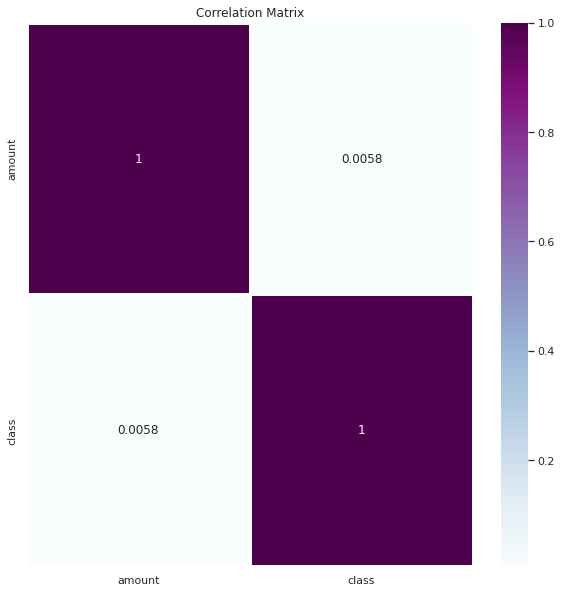

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df[["amount", "class"]].corr(),linewidth=3,annot=True, cmap='BuPu')
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Correlation Matrix')

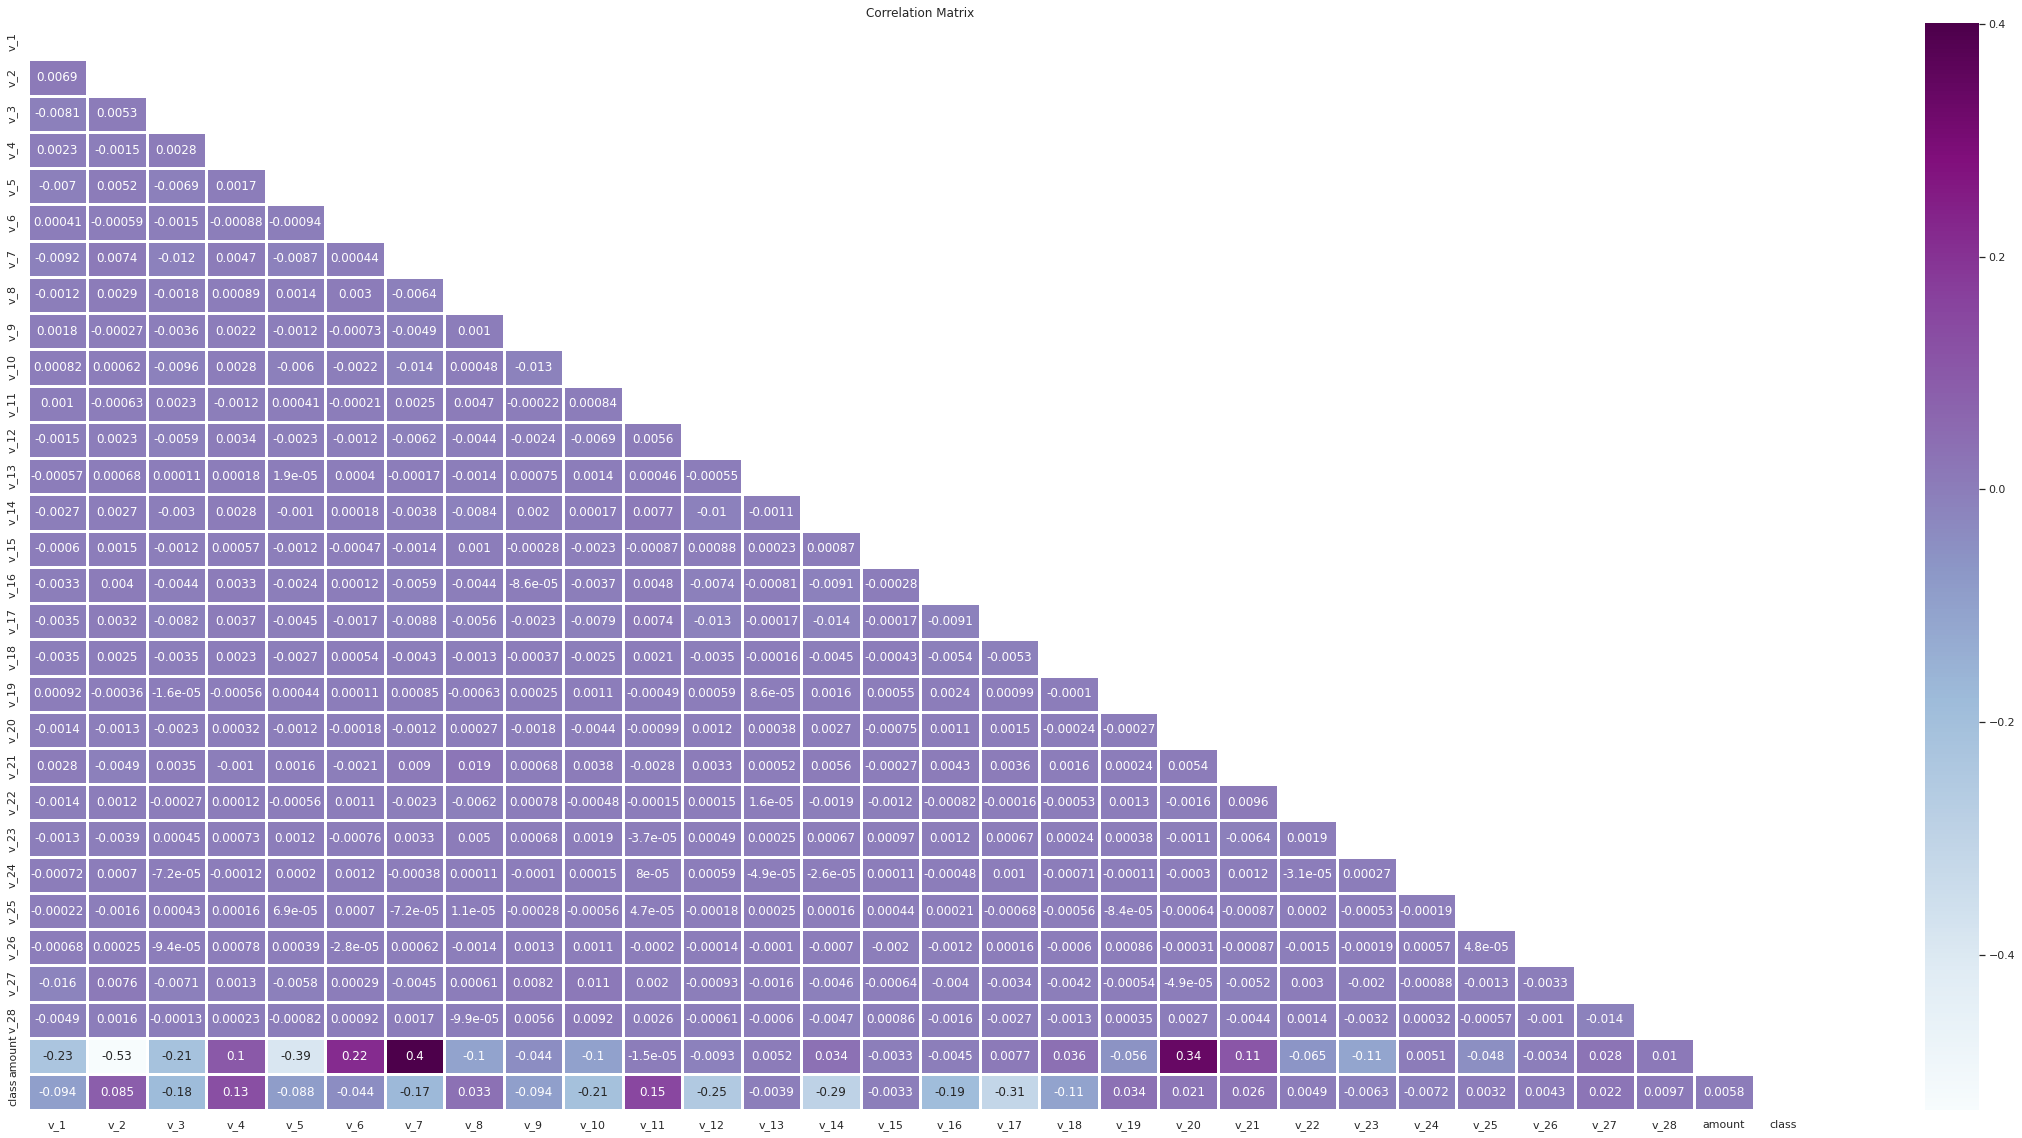

In [49]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),linewidth=3,annot=True, cmap='BuPu', mask=mask)
plt.title("Correlation Matrix")

<AxesSubplot:>

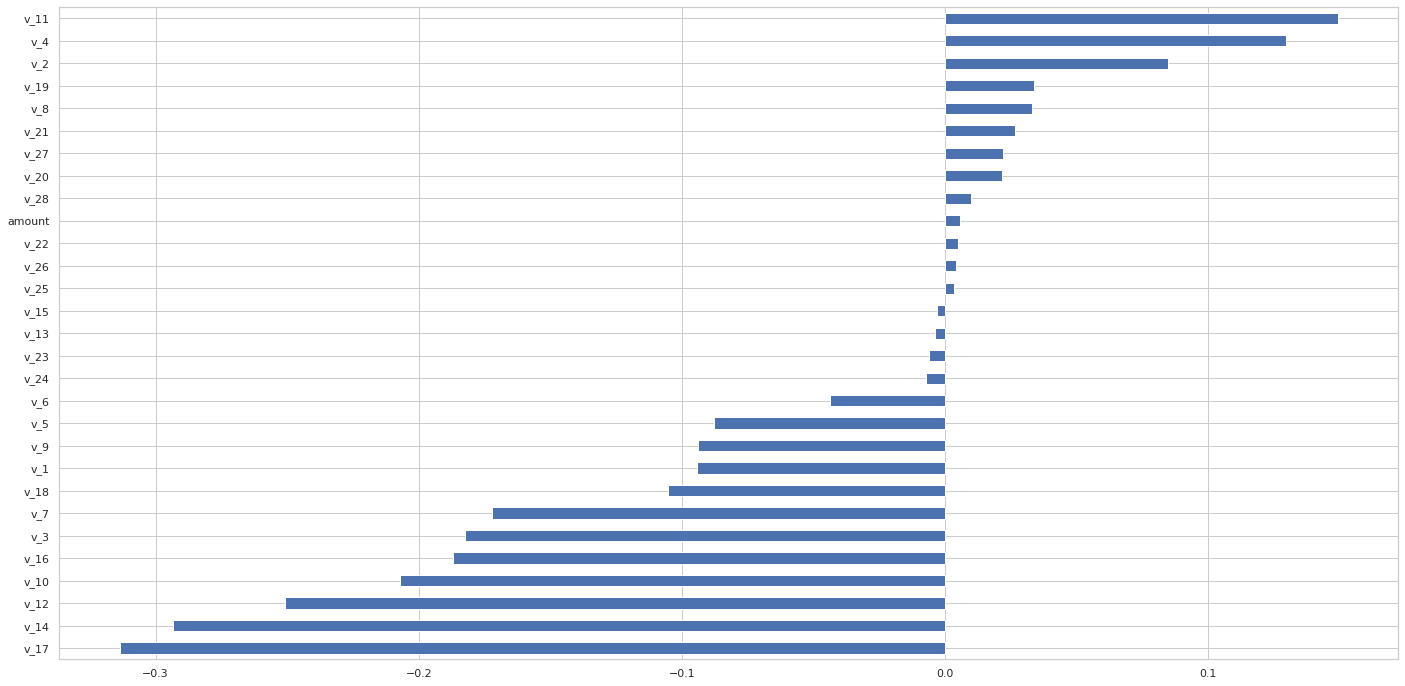

In [50]:
plt.figure(figsize=(24, 12))
df.corr()['class'].drop('class').sort_values().plot.barh()

In [51]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm

In [53]:
from scipy.stats import f_oneway
print("The Result of One-Way ANOVA Test:")
print("====="*10)
OneWay = stats.f_oneway(fraud_df[fraud_df["daytime"] == "10-21-Hours"]["amount"],
                        fraud_df[fraud_df["daytime"] == "03-09-Hours"]["amount"],
                        fraud_df[fraud_df["daytime"] == "22-02-Hours"]["amount"]
)
OneWay
alpha = 0.05
if OneWay.pvalue < alpha:
    result = f"* The F-statistic : {OneWay.statistic} \n* The P-value of {OneWay.pvalue}. \n* Since p value is smaller than the alpha value ({alpha}), we reject the null hypothesis. \n* These findings tells us that at least one of the group means is significantly different from the rest."
else:
    result = f"* The F-statistic : {OneWay.statistic} \n* The P-value of {OneWay.pvalue}. \n* Since p value is greater than the alpha value ({alpha}), we have fail to reject the null hypothesis. \n* According to these findings, there isn't a statistically significant difference between the group means."
print(result)

The Result of One-Way ANOVA Test:
* The F-statistic : 2.286521389962491 
* The P-value of 0.10274868379156481. 
* Since p value is greater than the alpha value (0.05), we have fail to reject the null hypothesis. 
* According to these findings, there isn't a statistically significant difference between the group means.


In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print("The comparisons with p-adj values less than 0.05 have significantly different mean scores:")
print("  ")
# Perform multiple pairwise comparison (Tukey HSD)
multi_comp = pairwise_tukeyhsd(endog=fraud_df['amount'], groups=fraud_df['daytime'], alpha=0.05)
print(multi_comp)

The comparisons with p-adj values less than 0.05 have significantly different mean scores:
  
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
03-09-Hours 10-21-Hours  62.6998 0.0855  -6.5893 131.9888  False
03-09-Hours 22-02-Hours  38.4881 0.5495 -48.5968 125.5731  False
10-21-Hours 22-02-Hours -24.2116 0.7045 -98.3089  49.8857  False
----------------------------------------------------------------


In [55]:
fraud_df.groupby("daytime")["amount"].mean()

daytime
03-09-Hours    80.095
10-21-Hours   142.795
22-02-Hours   118.583
Name: amount, dtype: float64

At night, at 22:00 - 02:00 the average amount of credit fraud is the highest

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

right before splitting it or using it for training

In [56]:
import sys
!{sys.executable} -m pip install deepchecks -U --quiet

In [57]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(df)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 2 categorical features were inferred.: class, daytime


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

Looking at the results, we observe that there is no problem with our data. It's clean.

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [58]:
X = df.drop(columns=["class"])
y = df["class"]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train.shape, X_test.shape

((255353, 30), (28373, 30))

In [60]:
random_state = 42


## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [61]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train)
test_ds = Dataset(X_test)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: daytime
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: daytime


In [62]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Validation Suite

Looking at the results, we conclude that our data there is no meaningful difference of distributions between our train data and test data. The data is not drifted.

#### Scaling

In [63]:
df.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,amount,class,daytime
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0,22-02-Hours
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0,22-02-Hours
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0,22-02-Hours
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0,22-02-Hours
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0,22-02-Hours


In [64]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weights

array([  0.50083553, 299.7100939 ])

In [65]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [67]:
log_model = LogisticRegression(
    penalty='l1',  solver='saga', 
    C=4.5, class_weight='balanced',
    random_state=42
)

In [68]:
# pipeline for Logistic Regression
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log", log_model)
])

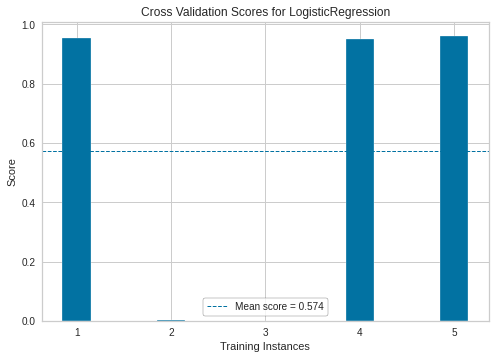

<AxesSubplot:title={'center':'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [69]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Instantiate the classification model and visualizer
model = model
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


In [70]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:

# resampling
# 1- SMOTE for imbalanced data (oversampling)
# 2- from imblearn.over_sampling import SMOTE (undersampling)
from imblearn.under_sampling import RandomUnderSampler 


In [72]:

import imblearn 
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

0.8.1


### Oversampling

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=random_state) 

# pipeline for SMOTE
pipe_smote = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
])
X_over, y_over = pipe_smote.fit_resample(X_train, y_train)

In [74]:
print('Unique Class:{}, value_counts:{}'.format(*np.unique(y_train, return_counts=True)))
print('Unique Class:{}, value_counts:{}'.format(*np.unique(y_over, return_counts=True)))

Unique Class:[0 1], value_counts:[254927    426]
Unique Class:[0 1], value_counts:[254927 254927]


In [75]:
pd.DataFrame(y_over).value_counts()

class
0        254927
1        254927
dtype: int64

### Undersampling

In [76]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=random_state) 

# pipeline for RandomUnderSampler
pipe_under = Pipeline([
    ("OneHotEncoder",column_trans),
    ("under", under),
])
X_under, y_under = pipe_under.fit_resample(X_train, y_train)

In [77]:
print('Unique Class:{}, value_counts:{}'.format(*np.unique(y_train, return_counts=True)))
print('Unique Class:{}, value_counts:{}'.format(*np.unique(y_under, return_counts=True)))

Unique Class:[0 1], value_counts:[254927    426]
Unique Class:[0 1], value_counts:[426 426]


In [78]:
pd.DataFrame(y_under).value_counts()

class
0        426
1        426
dtype: int64

### Hybrid Sampling

In [79]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

under = RandomUnderSampler(sampling_strategy={0: 25000}, random_state=random_state)
smote = SMOTE(sampling_strategy={1: 5000}, random_state=random_state)  

# pipeline for HybridSampler
# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipe_resampled = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
])
X_resampled, y_resampled = pipe_resampled.fit_resample(X_train, y_train)

In [80]:
print('Unique Class:{}, value_counts:{}'.format(*np.unique(y_train, return_counts=True)))
print('Unique Class:{}, value_counts:{}'.format(*np.unique(y_resampled, return_counts=True)))

Unique Class:[0 1], value_counts:[254927    426]
Unique Class:[0 1], value_counts:[25000  5000]


In [81]:
pd.DataFrame(y_resampled).value_counts()

class
0        25000
1         5000
dtype: int64

In [82]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def eval_metric_classification(model, X_train, y_train, X_test, y_test, model_name='', average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    # The style parameters control properties like the color of the background and whether a grid is enabled by default.
    sns.set_style("whitegrid", {'axes.grid' : False})
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(6, 6))
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0]);
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :np.array(f1_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'recall_test'   :np.array(recall_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'precision_test':np.array(precision_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :np.array(f1_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],        
        'recall_train'   :np.array(recall_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
        'precision_train':np.array(precision_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
    }, orient='index', columns=[model_name]).T

In [83]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [84]:
# After all models
# SHAP API for feature selection

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [85]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

In [86]:
cat = X_train.select_dtypes("object").columns.to_list()

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

log_model = LogisticRegression(random_state=random_state)

# pipeline for HybridSampler
# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipe_log = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log", log_model),
])

***ii. Model Training***

In [87]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('log', LogisticRegression(random_state=42))])

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.90      0.57      0.70        47

    accuracy                           1.00     28373
   macro avg       0.95      0.79      0.85     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.86      0.53      0.65       426

    accuracy                           1.00    255353
   macro avg       0.93      0.76      0.83    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic,0.999,0.000,0.000,0.000,0.999,0.000,0.000,0.000


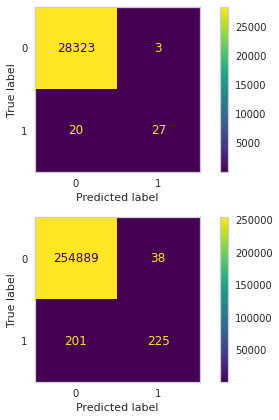

In [88]:
eval_metric_classification(
    pipe_log, X_train, y_train, X_test, y_test, 
    'Logistic', average=None, labels=[2]
)


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [89]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


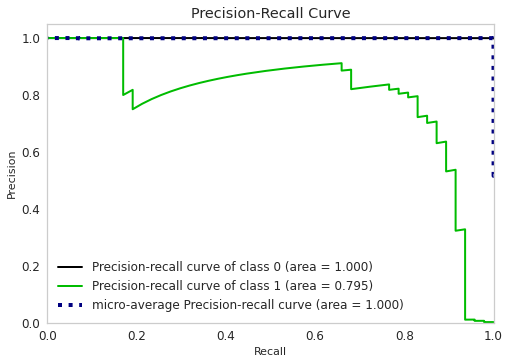

In [90]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

model = pipe_log
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show()

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [91]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_log)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Expected dataset with label.
Expected dataset with label.


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train.shape, X_test.shape

((255353, 30), (28373, 30))

In [93]:
cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [94]:
under     = RandomUnderSampler(sampling_strategy={0: 25000}, random_state=random_state) 
smote     = SMOTE(sampling_strategy={1: 5000}, random_state=random_state)


log_model = LogisticRegression(random_state=random_state)


# pipeline for HybridSampler
# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipe_log_smote = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
    ("log", log_model),
])
pipe_log_smote.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('log', LogisticRegression(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.28      0.91      0.43        47

    accuracy                           1.00     28373
   macro avg       0.64      0.96      0.71     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.24      0.85      0.38       426

    accuracy                           1.00    255353
   macro avg       0.62      0.92      0.69    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic,0.996,0.000,0.000,0.000,0.995,0.000,0.000,0.000


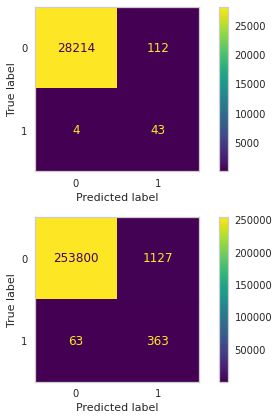

In [95]:
eval_metric_classification(
    pipe_log_smote, X_train, y_train, X_test, y_test, 
    'Logistic', average=None, labels=[2]
)

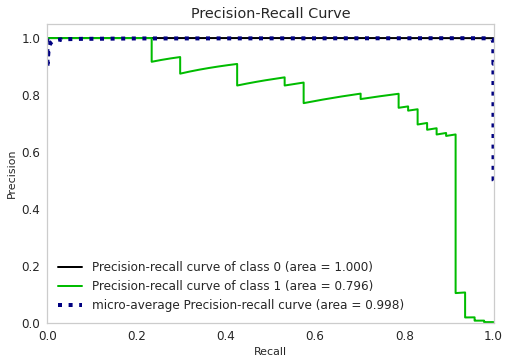

In [96]:
model = pipe_log_smote
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show()

With manuel class weights

***ii. Model Training***

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train.shape, X_test.shape

((255353, 30), (28373, 30))

In [98]:
cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [99]:
class_weights_manuel = {0:1, 1:15} #for logistic regression 1'e 15 katını vermek için 1e 20 de olabilir

In [100]:
log_model_manuel = LogisticRegression(class_weight = class_weights_manuel, random_state=random_state)

In [101]:
pipe_log_smote_manuel = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
    ("log", log_model_manuel),
])
pipe_log_smote_manuel.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('log',
                 LogisticRegression(class_weight={0: 1, 1: 15},
                                    random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     28326
           1       0.02      0.94      0.04        47

    accuracy                           0.93     28373
   macro avg       0.51      0.93      0.50     28373
weighted avg       1.00      0.93      0.96     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    254927
           1       0.02      0.94      0.04       426

    accuracy                           0.93    255353
   macro avg       0.51      0.93      0.50    255353
weighted avg       1.00      0.93      0.96    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic,0.928,0.000,0.000,0.000,0.928,0.000,0.000,0.000


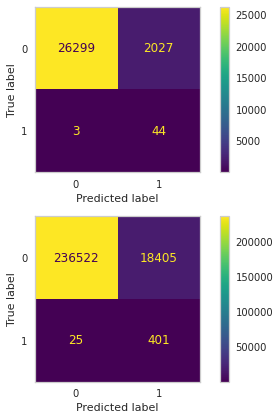

In [102]:
eval_metric_classification(
    pipe_log_smote_manuel, X_train, y_train, X_test, y_test, 
    'Logistic', average=None, labels=[2]
)

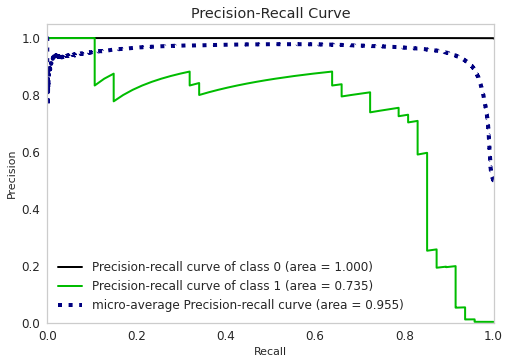

In [103]:
model_log_manuel = pipe_log_smote_manuel
model_log_manuel.fit(X_train, y_train)
y_pred_proba = model_log_manuel.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show()

SHAP

In [104]:
!pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import shap

In [106]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight=class_weights_manuel,max_iter=1000, random_state=random_state, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)

# Hocaların notu: shap değerleri tüm featurelar için çıkıyor ama bu data için sagada çıkmadı

# penalty="l1" : l2 yaparsak ayırt etmekte zorlanırız feature importance da

LogisticRegression(class_weight={0: 1, 1: 15}, max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

In [107]:
X_train_trans

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.21291636e-01, 3.15401676e-01, 2.08242835e-04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.22770621e-01, 3.15863404e-01, 2.29650977e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.15196395e-01, 3.11903650e-01, 5.02118238e-05],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.16594763e-01, 3.13336228e-01, 3.09444961e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.17369468e-01, 3.13826740e-01, 5.83469178e-04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.17422699e-01, 3.12422467e-01, 3.89238944e-04]])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.71      0.85      0.78        47

    accuracy                           1.00     28373
   macro avg       0.86      0.93      0.89     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.73      0.82      0.77       426

    accuracy                           1.00    255353
   macro avg       0.87      0.91      0.89    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.999,1.000,0.999,1.000,0.999,1.000,0.999,1.000


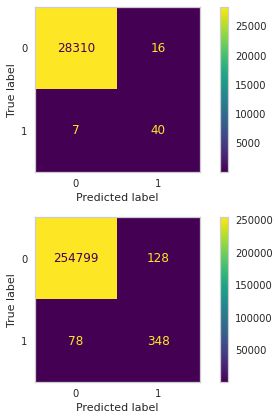

In [108]:
eval_metric_classification(model_shap, X_train_trans, y_train, X_test_trans, y_test)
# John Hoca: Recall 0.82 gelmiş. İyi sonuç diyebiliriz

In [109]:
scoring = {"f1_1" : make_scorer(f1_score, average = None, labels =[1]),
           "precision_1" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_1" : make_scorer(recall_score, average = None, labels =[1])}

In [110]:
model = LogisticRegression(class_weight=class_weights_manuel,max_iter=1000, random_state=random_state, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_1          0.764
test_precision_1   0.721
test_recall_1      0.814
dtype: float64

In [111]:
X_train.columns

Index(['v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'v_15', 'v_16', 'v_17', 'v_18', 'v_19',
       'v_20', 'v_21', 'v_22', 'v_23', 'v_24', 'v_25', 'v_26', 'v_27', 'v_28',
       'amount', 'daytime'],
      dtype='object')

In [112]:
features = column_trans_shap.get_feature_names_out(X_train.columns) # Featurelarımızın isimlerini alalım altta kullanacağız
features

array(['onehotencoder__daytime_03-09-Hours',
       'onehotencoder__daytime_10-21-Hours',
       'onehotencoder__daytime_22-02-Hours', 'remainder__v_1',
       'remainder__v_2', 'remainder__v_3', 'remainder__v_4',
       'remainder__v_5', 'remainder__v_6', 'remainder__v_7',
       'remainder__v_8', 'remainder__v_9', 'remainder__v_10',
       'remainder__v_11', 'remainder__v_12', 'remainder__v_13',
       'remainder__v_14', 'remainder__v_15', 'remainder__v_16',
       'remainder__v_17', 'remainder__v_18', 'remainder__v_19',
       'remainder__v_20', 'remainder__v_21', 'remainder__v_22',
       'remainder__v_23', 'remainder__v_24', 'remainder__v_25',
       'remainder__v_26', 'remainder__v_27', 'remainder__v_28',
       'remainder__amount'], dtype=object)

Feature Selection

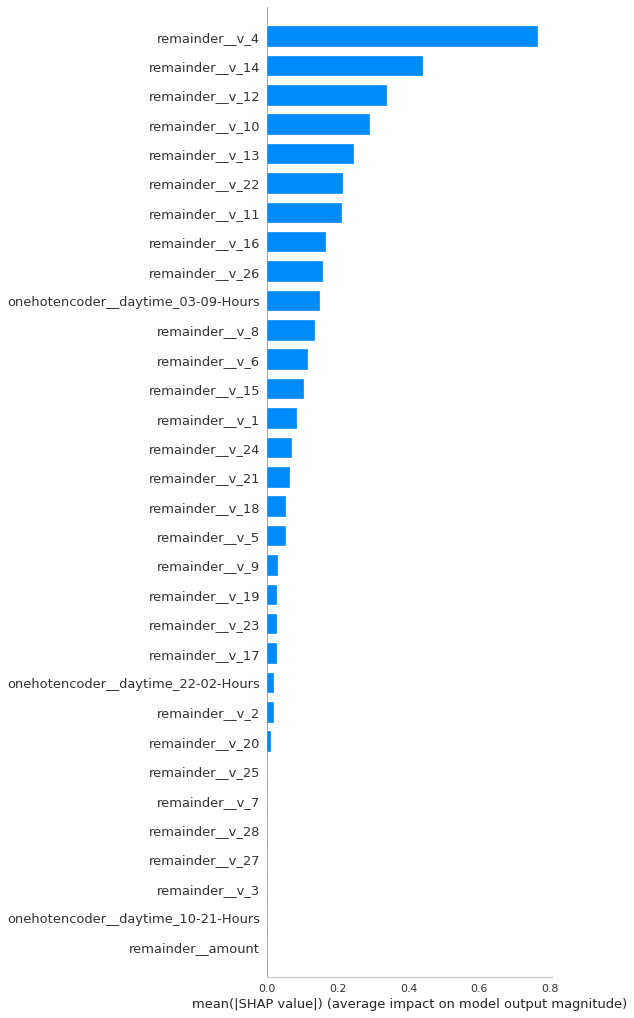

In [113]:
explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer
 
shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values, X_test_trans, max_display=300,feature_names = features, plot_type="bar")

# Her bir feature ın hangi sınıf için ne kadar önemli olduğunu gösteriyor çıktı ( class 0 : mavi , class1:Yeşil, class2: pembe)
# Bizim için önemli olan sınıf yeşiller????. Yani HispanicFraud?????? sınıfının belirlenmesinde hangi feature ım etkili. Buna bakıyoruz
# remainder_buttockkneelength????? etkiliymiş mesela.

# LinearExplainer : Bunun bir kaç çeşiti var. Bu linear modellerde daha çok kullanılıyor.

# Not: Test datası için sonuçlara baktık.

In [114]:
fraud_features = ["v_4", "v_14",  "v_12",  "v_10", "v_13", "v_11",
            "daytime",  "v_16", "v_8", "v_6", "v_24", "v_15",
            "v_26", "v_1", "v_21","v_18", "v_5", "v_19", 
            "v_23", "v_9"]

# Fraud için önemli olan featureları belirlemiş. Sadece bunlar ile model kurulursa ne olur bakalım

In [115]:
X2 = X[fraud_features]
y= df["class"]
X2.head()

,v_4,v_14,v_12,v_10,v_13,v_11,daytime,v_16,v_8,v_6,v_24,v_15,v_26,v_1,v_21,v_18,v_5,v_19,v_23,v_9
0,1.378,-0.311,-0.618,0.091,-0.991,-0.552,22-02-Hours,-0.470,0.099,0.462,0.067,1.468,-0.189,-1.360,-0.018,0.026,-0.338,0.404,-0.110,0.364
1,0.448,-0.144,1.065,-0.167,0.489,1.613,22-02-Hours,0.464,0.085,-0.082,-0.340,0.636,0.126,1.192,-0.226,-0.183,0.060,-0.146,0.101,-0.255
2,0.380,-0.166,0.066,0.208,0.717,0.625,22-02-Hours,-2.890,0.248,1.800,-0.689,2.346,-0.139,-1.358,0.248,-0.121,-0.503,-2.262,0.909,-1.515
3,-0.863,-0.288,0.178,-0.055,0.508,-0.226,22-02-Hours,-1.060,0.377,1.247,-1.176,-0.631,-0.222,-0.966,-0.108,1.966,-0.010,-1.233,-0.190,-1.387
4,0.403,-1.120,0.538,0.753,1.346,-0.823,22-02-Hours,-0.451,-0.271,0.096,0.141,0.175,0.502,-1.158,-0.009,-0.038,-0.407,0.803,-0.137,0.818


In [116]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['daytime'], dtype='object')

In [117]:
X2.shape

(283726, 20)

In [118]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=random_state, stratify =y)

In [119]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight=class_weight,max_iter=1000,
                                                            random_state=random_state, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['daytime'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight=<module 'sklearn.utils.class_weight' from '/usr/local/lib/python3.7/dist-packages/sklearn/utils/class_weight.py'>,
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.56      0.67        95

    accuracy                           1.00     56746
   macro avg       0.92      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.87      0.59      0.71       378

    accuracy                           1.00    226980
   macro avg       0.94      0.80      0.85    226980
weighted avg       1.00      1.00      1.00    226980



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.999,1.000,1.000,0.999,0.999,1.000,1.000,0.999


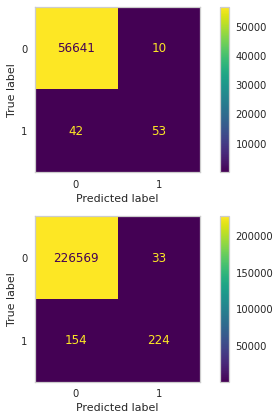

In [120]:
eval_metric_classification(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)
# CV sonuçlarına geçtik direk

In [121]:
# Shap dan önceki sonuçlar : Precision :0.41 , recall:0.76    f1:0.59
# Performansın düşmesini bekliyoruz çünkü daha az feature la çalışıyoruz
# Daha hızlı çalışmak isteyebilirsiniz, web uygulamasında müşterinin 30 feature girmesi yerine 10 feature girmesini isteyebiliriz
# .. En çok işinize yaramayan featureları atarak  hızlı çalışmanızı sağlıyor. Hızdan da öte maliyette
# .. büyük şirketler için önemli olmaya başladı. Arkada server ı ne kadar kullanırlarsa şirket ona göre ücret ödedikleri için

# Sonuç olarak SHAP çok kullanılan bir model değil ama kullanılabilir. Not olarak logistic regression kullanacaksanız penalty='l1' olmalı

In [122]:
# precisionrecallcurve çizdirmek için 2 tane yaklaşım
# 1.from yellowbrick.classifier import PrecisionRecallCurve
# 2.from scikitplot.metrics import plot_roc, precision_recall_curve , 
# ..from scikitplot.metrics import plot_precision_recall

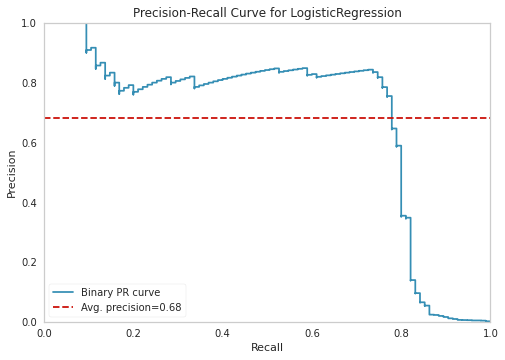

In [123]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Fraudalent", "Non-Fraudalent"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

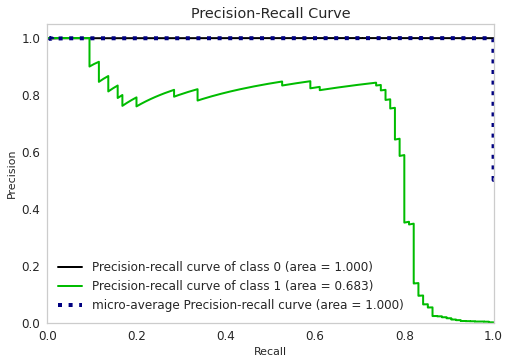

In [124]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

In [125]:
# class chat soru : Hocam scoring neden recall seçildi? Tekrar değinebilir misiniz?
# John hoca: hastaneye 10000 hasta geliyor 50 tanesi kanserli. Bu 50 kanserli hastayı bulmak istiyorum özellikle yoksa
# .. ölecek hastalar. O yüzden recall kritik bir metrik

# f1 seçseydik precision değeri de yükselecekti ama recall , recall a yüklenmediğimiz(çünkü f1 in yüksek olmasını istediğimiz) için düşük olacaktı
# .. f1 sonucu gelecekti ama bu sefer (kanserli olan hastaları) doğru tahmin etme oranım azalacaktı. Sonuç olarak bunu istemedik burada

In [126]:
with open('FraudDetection_Log_Model.pkl', 'wb') as f:
	pickle.dump(pipe_log_smote_manuel, f)

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iv.  Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [127]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_log)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Expected dataset with label.
Expected dataset with label.


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

In [128]:
## compare_models = pd.concat([KNN_results, xgb_results, ], axis=1)

## Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

import libraries

In [129]:
from sklearn.ensemble import RandomForestClassifier

***i. Model Training***

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train.shape, X_test.shape

((255353, 30), (28373, 30))

In [131]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

***iii. Plot Precision and Recall Curve***


In [190]:
RF_model = RandomForestClassifier(random_state=random_state)

operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pipe_RF = Pipeline(steps=operations)
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('RF_model', RandomForestClassifier(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.95      0.83      0.89        47

    accuracy                           1.00     28373
   macro avg       0.98      0.91      0.94     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       1.00      1.00      1.00       426

    accuracy                           1.00    255353
   macro avg       1.00      1.00      1.00    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


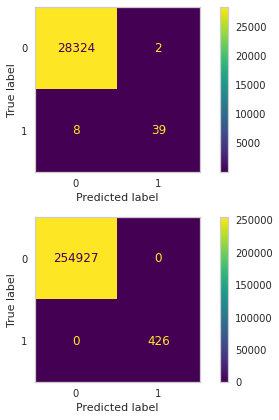

In [191]:
eval_metric_classification(pipe_RF, X_train, y_train, X_test, y_test)

In [192]:
pipe_RF_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("RF_model", RF_model)
])
pipe_RF_smote.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('RF_model', RandomForestClassifier(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.64      0.87      0.74        47

    accuracy                           1.00     28373
   macro avg       0.82      0.94      0.87     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.70      1.00      0.82       426

    accuracy                           1.00    255353
   macro avg       0.85      1.00      0.91    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.999,0.999,0.999,1.000,0.999,1.000,0.999,1.000


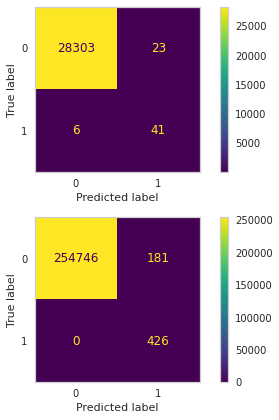

In [193]:
eval_metric_classification(pipe_RF_smote, X_train, y_train, X_test, y_test)

In [138]:
RF_model.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [186]:
params = { 
    'max_depth': [2, 3, 4],
    'n_estimators': [50, 100, 200]}

In [194]:
RF_grid = GridSearchCV(RF_model, param_grid=params, scoring = "recall", verbose=2, n_jobs = -1)


pipe_RF_grid_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("RF_grid", RF_grid)
])
pipe_RF_grid_smote.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('RF_grid',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [2, 3, 4],
                                          'n_estimators': [50, 100, 200]},
                              scoring='recall', verbose=2))])

In [195]:
pipe_RF_grid_smote["RF_grid"].best_params_

{'max_depth': 4, 'n_estimators': 200}

In [196]:
RF_model = RandomForestClassifier(n_estimators= 200, max_depth= 4 , random_state=101 )

pipe_RF_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("RF", RF_model)
])
pipe_RF_smote.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('RF',
                 RandomForestClassifier(max_depth=4, n_estimators=200,
                                        random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.68      0.85      0.75        47

    accuracy                           1.00     28373
   macro avg       0.84      0.93      0.88     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.72      0.84      0.77       426

    accuracy                           1.00    255353
   macro avg       0.86      0.92      0.89    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.999,1.000,0.999,1.000,0.999,1.000,0.999,1.000


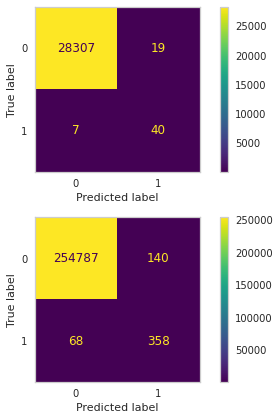

In [197]:
eval_metric_classification(pipe_RF_smote, X_train, y_train, X_test, y_test)

## with smote and weight

In [198]:
RF_model = RandomForestClassifier(n_estimators= 200, max_depth= 4 , class_weight = {0:1, 1:15}, random_state=101 ) 
#class_weights = "balanced" gives same result

pipe_RF_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("RF", RF_model)
])
pipe_RF_smote.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('RF',
                 RandomForestClassifier(class_weight={0: 1, 1: 15}, max_depth=4,
                                        n_estimators=200, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28326
           1       0.05      0.89      0.09        47

    accuracy                           0.97     28373
   macro avg       0.52      0.93      0.54     28373
weighted avg       1.00      0.97      0.98     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    254927
           1       0.05      0.93      0.09       426

    accuracy                           0.97    255353
   macro avg       0.52      0.95      0.54    255353
weighted avg       1.00      0.97      0.98    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.971,0.985,0.971,1.000,0.968,0.984,0.968,1.000


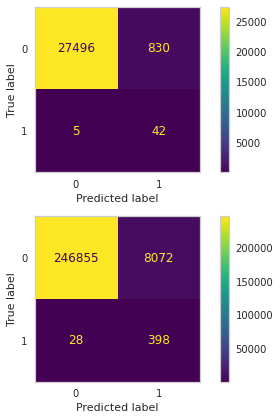

In [199]:
eval_metric_classification(pipe_RF_smote, X_train, y_train, X_test, y_test)

In [136]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

## best RF model

In [200]:
RF_model = RandomForestClassifier(n_estimators= 200, max_depth= 4 , random_state=101 ) 

pipe_RF_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("RF", RF_model)
])
pipe_RF_smote.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('RF',
                 RandomForestClassifier(max_depth=4, n_estimators=200,
                                        random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.68      0.85      0.75        47

    accuracy                           1.00     28373
   macro avg       0.84      0.93      0.88     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.72      0.84      0.77       426

    accuracy                           1.00    255353
   macro avg       0.86      0.92      0.89    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.999,1.000,0.999,1.000,0.999,1.000,0.999,1.000


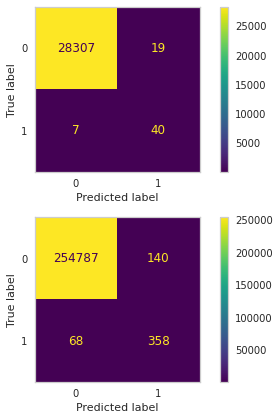

In [201]:
eval_metric_classification(pipe_RF_smote, X_train, y_train, X_test, y_test)

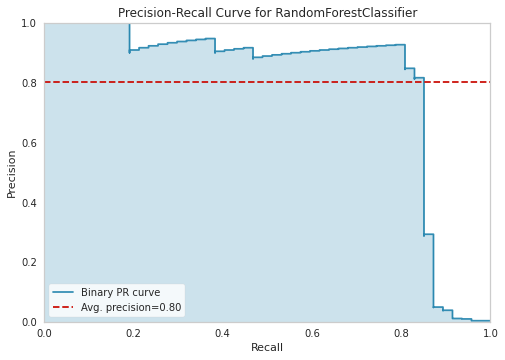

In [202]:
from yellowbrick.classifier import PrecisionRecallCurve

model = pipe_RF_smote
visualizer = PrecisionRecallCurve(model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

In [203]:
y_pred = pipe_RF_smote.predict(X_test)
y_train_pred = pipe_RF_smote.predict(X_train)

In [204]:
print('RF Predictions')
RF_Pred = {"Actual": y_test, "RF_Pred":y_pred}
RF_Pred = pd.DataFrame.from_dict(RF_Pred)
RF_Pred.sample(5)

RF Predictions


,Actual,RF_Pred
206575,0,0
259697,0,0
134979,0,0
16775,0,0
3575,0,0


In [205]:
RF_results = train_val(y_train, y_train_pred, y_test, y_pred)
RF_results.rename(columns={"train_set": "RF_train", "test_set": "RF_test"}, inplace=True)
RF_results

,RF_train,RF_test
Accuracy,0.999,0.999
Precision,0.719,0.678
Recall,0.840,0.851
f1,0.775,0.755


In [149]:
## compare_models = pd.concat([KNN_results, xgb_results, ], axis=1)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [150]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_RF_smote)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Expected dataset with label.
Expected dataset with label.


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

**without** **smote**

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train.shape, X_test.shape

((255353, 30), (28373, 30))

***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [207]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [208]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model = XGBClassifier(random_state=101)

operations = [("OrdinalEncoder", column_trans), ("XGB_model", xgb_model)]

pipe_XGB = Pipeline(steps=operations)
pipe_XGB.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['daytime'])])),
                ('XGB_model', XGBClassifier(random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.95      0.79      0.86        47

    accuracy                           1.00     28373
   macro avg       0.97      0.89      0.93     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.97      0.83      0.89       426

    accuracy                           1.00    255353
   macro avg       0.98      0.91      0.95    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


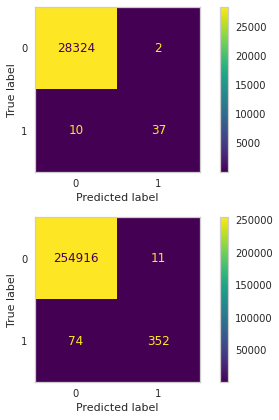

In [209]:
eval_metric_classification(pipe_XGB, X_train, y_train, X_test, y_test)

**with** **smote**

In [210]:
pipe_xgb_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("xgb", xgb_model)
])
pipe_xgb_smote.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('xgb', XGBClassifier(random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.51      0.89      0.65        47

    accuracy                           1.00     28373
   macro avg       0.76      0.95      0.83     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.47      0.89      0.62       426

    accuracy                           1.00    255353
   macro avg       0.74      0.94      0.81    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.998,0.999,0.999,1.000,0.998,0.999,0.998,1.000


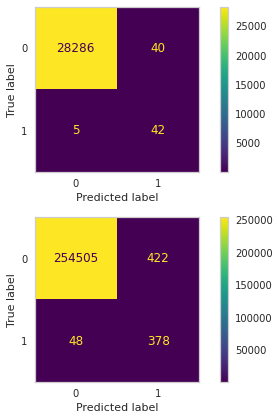

In [156]:
eval_metric_classification(pipe_xgb_smote, X_train, y_train, X_test, y_test)

In [211]:
params = { 
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.001, 0.01, 0.1],
    'xgb__n_estimators': [50, 100, 200]}

In [212]:
xgb_model.get_params().keys()


dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [160]:
# xgb_grid = GridSearchCV(pipe_xgb_smote, param_grid=params, scoring = "recall", verbose=2, n_jobs = -1)
# xgb_grid.fit(X_train, y_train)


"""Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['daytime'])])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy={1: 5000})),
                                       ('under',
                                        RandomUnderSampler(random_state=42,
                                                           sampling_strategy={0: 25000})),
                                       ('xgb',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.001, 0.01, 0.1],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)
"""


#xgb_grid.best_params_

"""{'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}"""

"{'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}"

In [213]:
xgb_model = XGBClassifier(n_estimators= 1000, max_depth= 30, learning_rate= 0.01 , random_state=101, colsample_bytree=0.3, gamma=50)

pipe_xgb_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("xgb", xgb_model)
])
pipe_xgb_smote.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('xgb',
                 XGBClassifier(colsample_bytree=0.3, gamma=50,
                               learning_rate=0.01, max_depth=30,
                               n_estimators=1000, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.48      0.91      0.63        47

    accuracy                           1.00     28373
   macro avg       0.74      0.96      0.82     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.49      0.87      0.62       426

    accuracy                           1.00    255353
   macro avg       0.74      0.93      0.81    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.998,0.999,0.998,1.000,0.998,0.999,0.998,1.000


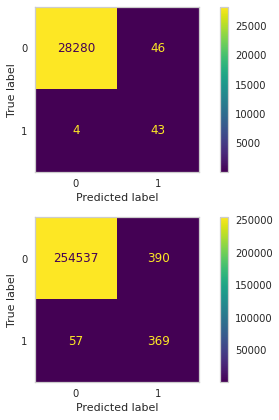

In [214]:
eval_metric_classification(pipe_xgb_smote, X_train, y_train, X_test, y_test)

In [157]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

## xgb smote and class weight

In [216]:
xgb_model = XGBClassifier(n_estimators= 1000, max_depth= 30, learning_rate= 0.01 , colsample_bytree=0.3, gamma=50, class_weight = {0:1, 1:15}, random_state=101 ) 
#class_weights = "balanced" gives same result

pipe_xgb_smote = Pipeline([
    ("OrdinalEncoder", column_trans),
    ("smote", smote),
    ("under", under),
    ("xgb", xgb_model)
])
pipe_xgb_smote.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['daytime'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={1: 5000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 25000})),
                ('xgb',
                 XGBClassifier(class_weight={0: 1, 1: 15}, colsample_bytree=0.3,
                               gamma=50, learning_rate=0.01, max_depth=30,
                               n_estimators=1000, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.48      0.91      0.63        47

    accuracy                           1.00     28373
   macro avg       0.74      0.96      0.82     28373
weighted avg       1.00      1.00      1.00     28373




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254927
           1       0.49      0.87      0.62       426

    accuracy                           1.00    255353
   macro avg       0.74      0.93      0.81    255353
weighted avg       1.00      1.00      1.00    255353



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.998,0.999,0.998,1.000,0.998,0.999,0.998,1.000


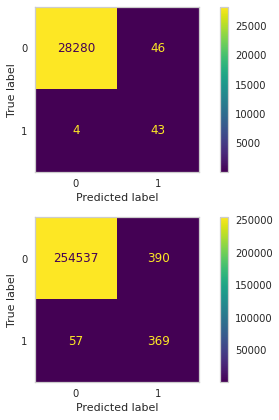

In [217]:
eval_metric_classification(pipe_xgb_smote, X_train, y_train, X_test, y_test)

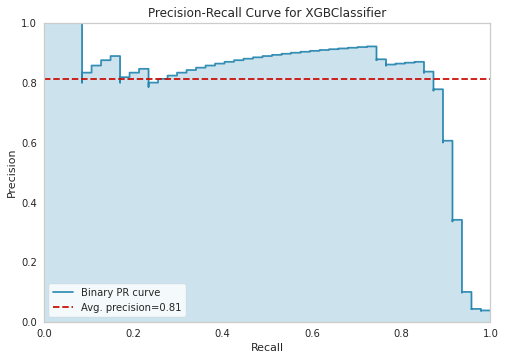

In [218]:
from yellowbrick.classifier import PrecisionRecallCurve

model = pipe_xgb_smote
visualizer = PrecisionRecallCurve(model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

In [166]:
y_pred = pipe_xgb_smote.predict(X_test)
y_train_pred = pipe_xgb_smote.predict(X_train)

In [167]:
print('XGB Predictions','green')
XGB_Pred = {"Actual": y_test, "XGB_Pred":y_pred}
XGB_Pred = pd.DataFrame.from_dict(XGB_Pred)
XGB_Pred.sample(5)

XGB Predictions green


,Actual,XGB_Pred
211783,0,0
14885,0,0
181059,0,0
206453,0,0
107399,0,0


In [168]:
xgb_results = train_val(y_train, y_train_pred, y_test, y_pred)
xgb_results.rename(columns={"train_set": "xgb_train", "test_set": "xgb_test"}, inplace=True)
xgb_results

,xgb_train,xgb_test
Accuracy,0.998,0.998
Precision,0.472,0.512
Recall,0.887,0.894
f1,0.617,0.651


In [169]:
## compare_models = pd.concat([KNN_results, xgb_results, ], axis=1)

***iii. Plot Precision and Recall Curve***


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [170]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_xgb_smote)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Expected dataset with label.
Expected dataset with label.


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [171]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from keras.metrics import categorical_crossentropy
from keras.layers import Dropout, Dense, BatchNormalization
from keras.callbacks import EarlyStopping


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,random_state = 42)
X_train.shape, X_test.shape

((255353, 30), (28373, 30))

In [173]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [174]:
pipe_resampled = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
])
X_train, y_train = pipe_resampled.fit_resample(X_train, y_train)

***ii. Define Model***

In [175]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

In [176]:
ANN_model = Sequential()
ANN_model.add(Dense(256, input_dim = X_train.shape[1], activation='relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation='relu'))
ANN_model.add(Dropout(0.3))
opt = Adam(lr = 0.002)
ANN_model.add(Dense(1, activation='sigmoid'))
ANN_model.compile(optimizer=opt, loss='binary_crossentropy',  metrics=metrics)

In [177]:
callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_300.h5")]
class_weight = {0: 0.500, 1: 299.710}

In [178]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 74,497
Trainable params: 74,497
Non-trainable params: 0
_________________________________________________________________


***iii. Compile Model***

In [179]:

ANN_model.fit(
    X_train, 
    y_train, 
    epochs=300, 
    batch_size=2048, 
    verbose=2,
    callbacks=callbacks,
    class_weight=class_weight
    )

Epoch 1/300
15/15 - 3s - loss: 6.7963 - fn: 94.0000 - fp: 24499.0000 - tn: 501.0000 - tp: 4906.0000 - precision: 0.1668 - recall: 0.9812 - 3s/epoch - 231ms/step
Epoch 2/300
15/15 - 1s - loss: 3.1693 - fn: 0.0000e+00 - fp: 25000.0000 - tn: 0.0000e+00 - tp: 5000.0000 - precision: 0.1667 - recall: 1.0000 - 622ms/epoch - 41ms/step
Epoch 3/300
15/15 - 1s - loss: 2.4939 - fn: 0.0000e+00 - fp: 25000.0000 - tn: 0.0000e+00 - tp: 5000.0000 - precision: 0.1667 - recall: 1.0000 - 754ms/epoch - 50ms/step
Epoch 4/300
15/15 - 1s - loss: 2.3295 - fn: 0.0000e+00 - fp: 25000.0000 - tn: 0.0000e+00 - tp: 5000.0000 - precision: 0.1667 - recall: 1.0000 - 1s/epoch - 77ms/step
Epoch 5/300
15/15 - 1s - loss: 2.1881 - fn: 0.0000e+00 - fp: 25000.0000 - tn: 0.0000e+00 - tp: 5000.0000 - precision: 0.1667 - recall: 1.0000 - 1s/epoch - 86ms/step
Epoch 6/300
15/15 - 1s - loss: 2.0250 - fn: 0.0000e+00 - fp: 25000.0000 - tn: 0.0000e+00 - tp: 5000.0000 - precision: 0.1667 - recall: 1.0000 - 831ms/epoch - 55ms/step
Epoch

In [180]:
loss_df = pd.DataFrame(ANN_model.history.history)
loss_df.tail()

,loss,fn,fp,tn,tp,precision,recall
295,1.022,6.000,14448.000,10552.000,4994.000,0.257,0.999
296,1.055,6.000,14823.000,10177.000,4994.000,0.252,0.999
297,1.072,10.000,14736.000,10264.000,4990.000,0.253,0.998
298,1.058,9.000,14625.000,10375.000,4991.000,0.254,0.998
299,1.006,10.000,14038.000,10962.000,4990.000,0.262,0.998


<AxesSubplot:>

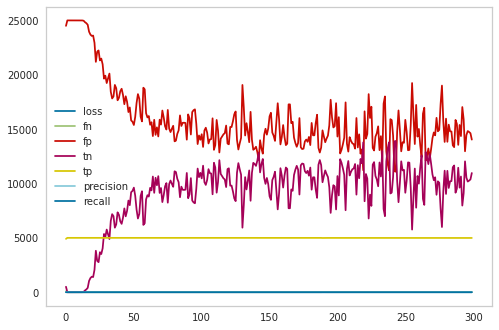

In [181]:
loss_df = pd.DataFrame(ANN_model.history.history)
loss_df.plot()

***iv. Fit Model***

In [182]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

***v. Prediction and Model Evaluating***

In [183]:
# evaluate the model
scores = ANN_model.evaluate(X_train, y_train)
print(ANN_model.metrics_names, scores)

938/938 [==============================] - 3s 3ms/step - loss: 1.6151 - fn: 0.0000e+00 - fp: 16945.0000 - tn: 8055.0000 - tp: 5000.0000 - precision: 0.2278 - recall: 1.0000
['loss', 'fn', 'fp', 'tn', 'tp', 'precision', 'recall'] [1.615115761756897, 0.0, 16945.0, 8055.0, 5000.0, 0.2278423309326172, 1.0]


In [184]:
y_pred_proba = ANN_model.predict(X_test)

ValueError: ignored

In [ ]:
type(y_pred_proba)

In [ ]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and
    batch_size are set by the constants at the top of the
    notebook.
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    history = model.fit(X_train
                       , y_train
                       , epochs=300
                       , batch_size=2048
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history

In [ ]:
deep_model(ANN_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = ANN_model.predict(X_test) > 0.5  # ÖNEMLİ NOT: Tensorflow önceki versiyonlarında 0-1 sonuçlar üretiyordu.
# .. Yeni versiyonda üretmesi için > 0.5 diye bir eşik üretiyoruz burada(yapmamız gerekiyor(sigmoid için))
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 0 ve 1 in recall değerlerinin birbirine yakın olması, bize dengesizliğin olmadığını söylüyor
# Eğer dengesizlik olsaydı yukarda "class_weight" kullanarak modeli kurmamız gerekiyordu

In [ ]:
"""eval_metric_classification(ANN_model, X_train, y_train, X_test, y_test)""" # ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
eval_metric_classification(ANN_model, X_train, y_train, X_test, y_test)

In [ ]:
"""X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)"""

In [ ]:
y_pred_proba = ANN_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

***vi. Plot Precision and Recall Curve***

In [ ]:
ANN_model.save('FraudDetection_ANN.h5')

Now With Balanced Values

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=random_state) 

# pipeline for RandomUnderSampler
pipe_under = Pipeline([
    ("OneHotEncoder",column_trans),
    ("under", under),
])
X_under, y_under = pipe_under.fit_resample(X_train, y_train)

In [ ]:
undersampled_data = imblearn.under_sampling.NearMiss(version = 1)

In [ ]:
pd.DataFrame(y_under).value_counts()

In [ ]:
pipe_resampled = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
])
X_resampled, y_resampled = pipe_resampled.fit_resample(X_train, y_train)

In [ ]:
plot_points(X,y)

In [ ]:
y.value_counts()

In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

In [ ]:
df_sample=df_train_0.sample(473) #after dropping duplicated fraud values
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In [ ]:
df=df_train_1

In [ ]:
X_s = df.drop('class', axis=1)
y_s = df['class']

In [ ]:
undersample_model.summary()

In [ ]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

In [ ]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [ ]:
undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

In [ ]:
# way-1
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_log)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [ ]:
ANN_model.save('FraudDetection_ANN.h5')

with open('FraudDetection_??_Model.pkl', 'wb') as f:
	pickle.dump(??, f)


### Save and Export Variables

In [ ]:
import pickle
pickle.dump(ANN_scaler, open("FraudDetection_ANN", 'wb')) 
# with open('model_pkl', 'wb') as files:
#     pickle.dump(model, files)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___